In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
df=pd.read_csv("dataset_group.csv")

# EDA (Question 1)

In [10]:
df.head()

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [14]:
df.duplicated().sum()

4730

In [16]:
df.isnull().sum()

Date        0
Order_id    0
Product     0
dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order_id,20641.0,575.986289,328.557078,1.0,292.0,581.0,862.0,1139.0


In [19]:
df['Product'].unique()

array(['yogurt', 'pork', 'sandwich bags', 'lunch meat', 'all- purpose',
       'flour', 'soda', 'butter', 'beef', 'aluminum foil', 'dinner rolls',
       'shampoo', 'mixes', 'soap', 'laundry detergent', 'ice cream',
       'toilet paper', 'hand soap', 'waffles', 'cheeses', 'milk',
       'dishwashing liquid/detergent', 'individual meals', 'cereals',
       'tortillas', 'spaghetti sauce', 'ketchup', 'sandwich loaves',
       'poultry', 'bagels', 'eggs', 'juice', 'pasta', 'paper towels',
       'coffee/tea', 'fruits', 'sugar'], dtype=object)

In [20]:
df['Product'].nunique()

37

In [57]:
df[df['Product']==None]

,Order_id,Product,Timestamp


**Date column converstion to timestamp data type**

In [5]:
df['Timestamp']=pd.DataFrame(df,columns=['Date'])

In [23]:
df.head()

,Date,Order_id,Product,Timestamp
0,01-01-2018,1,yogurt,01-01-2018
1,01-01-2018,1,pork,01-01-2018
2,01-01-2018,1,sandwich bags,01-01-2018
3,01-01-2018,1,lunch meat,01-01-2018
4,01-01-2018,1,all- purpose,01-01-2018


In [6]:
df.drop(labels='Date',inplace=True,axis=1)

In [25]:
df.head()

,Order_id,Product,Timestamp
0,1,yogurt,01-01-2018
1,1,pork,01-01-2018
2,1,sandwich bags,01-01-2018
3,1,lunch meat,01-01-2018
4,1,all- purpose,01-01-2018


In [9]:
df.to_excel(r'C:\Users\jpradhan\Downloads\MRA-Milestone2\df_final.xlsx', index = False)

In [8]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

** Frequency Of Most Popular Item Analysis**

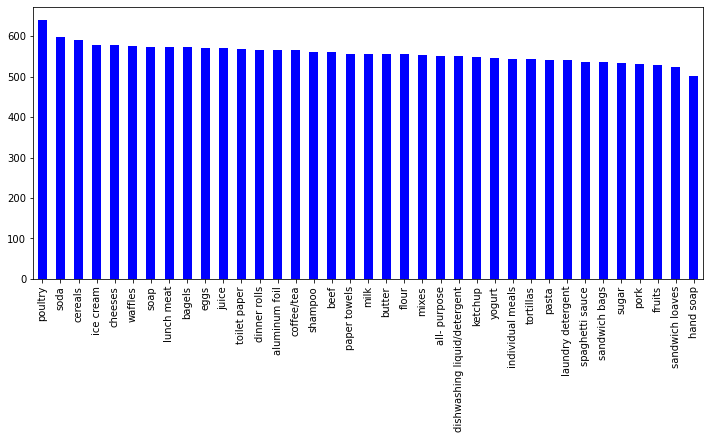

In [47]:
df['Product'].value_counts().sort_values(ascending=False).plot(kind='bar',figsize=(12,5),color='blue');

**Most popular product is Poultry and least popular is hand soap**

# Market Basket Analysis

**Create Basket**

In [10]:
basket=df.groupby(['Order_id','Product'])['Product'].count().unstack().reset_index().fillna(0).set_index('Order_id')

In [11]:
basket.head()

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,1.0,2.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0


**Encoding**

In [13]:
def encode(x):
    if x <=0:
        return 0
    if x >=1:
        return 1

In [14]:
basket=basket.applymap(encode)

In [16]:
basket.head()

Product,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,sandwich loaves,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,waffles,yogurt
Order_id,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,1,1,0,0,0,1,0,...,0,1,1,1,0,0,0,0,0,1
2,0,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,1,1,1,1
3,0,0,1,0,0,1,1,0,1,0,...,1,1,1,1,1,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
5,1,0,0,0,0,0,0,0,1,0,...,1,0,0,1,1,0,1,1,1,1


**Find Support**

The support metric measures the share of transactions that contain an itemset.

(number of transactions with items(s) / total number of transactions)

In [34]:
from mlxtend.frequent_patterns import apriori

In [36]:
itemsets = apriori(basket, min_support = 0.01, use_colnames = True, low_memory=True)
itemsets

,support,itemsets
0,0.374890,(all- purpose)
1,0.384548,(aluminum foil)
2,0.385426,(bagels)
3,0.374890,(beef)
4,0.367867,(butter)
...,...,...
610567,0.010536,"(mixes, soap, spaghetti sauce, sandwich bags, ..."
610568,0.011414,"(mixes, soap, spaghetti sauce, sandwich bags, ..."
610569,0.010536,"(laundry detergent, soap, shampoo, poultry, so..."
610570,0.011414,"(mixes, yogurt, sandwich bags, shampoo, poultr..."


C:\Users\jpradhan\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


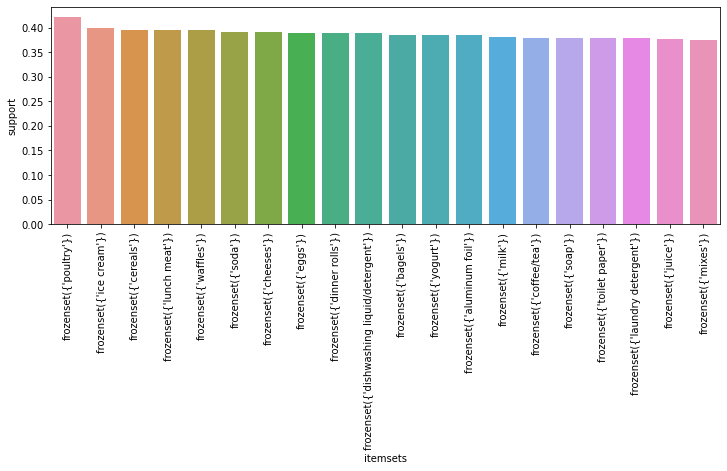

In [55]:
plt.figure(figsize=(12,4))
sns.barplot(itemsets.sort_values('support',ascending=False).iloc[0:20,1],
            itemsets.sort_values('support',ascending=False).iloc[0:20,0])
plt.xticks(rotation=90)
plt.show();

**Check the rules using association rules**

In [42]:
from mlxtend.frequent_patterns import association_rules

In [43]:
basket = association_rules(itemsets, metric ="lift") 
basket = basket.sort_values(['lift','confidence'], ascending =[False, False]) 

In [56]:
basket.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21916487,"(sandwich bags, all- purpose, sugar, ketchup)","(soap, flour, laundry detergent)",0.023705,0.058824,0.011414,0.481481,8.185185,0.010019,1.815126
21916494,"(soap, flour, laundry detergent)","(sandwich bags, all- purpose, sugar, ketchup)",0.058824,0.023705,0.011414,0.194030,8.185185,0.010019,1.211329
21907020,"(coffee/tea, all- purpose, toilet paper, fruits)","(beef, cereals, butter)",0.022827,0.058824,0.010536,0.461538,7.846154,0.009193,1.747899
21907061,"(beef, cereals, butter)","(coffee/tea, all- purpose, toilet paper, fruits)",0.058824,0.022827,0.010536,0.179104,7.846154,0.009193,1.190374
22026355,"(individual meals, pork, ice cream, milk)","(shampoo, cereals, sandwich loaves)",0.020193,0.067603,0.010536,0.521739,7.717674,0.009170,1.949557
22026370,"(shampoo, cereals, sandwich loaves)","(individual meals, pork, ice cream, milk)",0.067603,0.020193,0.010536,0.155844,7.717674,0.009170,1.160694
22029863,"(milk, lunch meat, ketchup, cheeses)","(coffee/tea, soap, pork)",0.022827,0.065847,0.011414,0.500000,7.593333,0.009910,1.868306
22029918,"(coffee/tea, soap, pork)","(milk, lunch meat, ketchup, cheeses)",0.065847,0.022827,0.011414,0.173333,7.593333,0.009910,1.182064
21916470,"(sugar, all- purpose, laundry detergent, ketchup)","(sandwich bags, flour, soap)",0.025461,0.059701,0.011414,0.448276,7.508621,0.009893,1.704291
21916511,"(sandwich bags, flour, soap)","(sugar, all- purpose, laundry detergent, ketchup)",0.059701,0.025461,0.011414,0.191176,7.508621,0.009893,1.204885


sandwich bags, all- purpose, sugar, ketchup with soap, flour, laundry detergent are having highest lift so combo offer ca be provide on these items.

**Sort Values by Support**

In [59]:
basket = basket.sort_values(['support'], ascending =[False]) 

In [60]:
basket.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
553,(poultry),(dinner rolls),0.421422,0.388938,0.194908,0.462500,1.189137,0.031001,1.136860
552,(dinner rolls),(poultry),0.388938,0.421422,0.194908,0.501129,1.189137,0.031001,1.159773
668,(eggs),(soda),0.389816,0.390694,0.187006,0.479730,1.227892,0.034708,1.171134
606,(dishwashing liquid/detergent),(poultry),0.388060,0.421422,0.187006,0.481900,1.143510,0.023469,1.116731
607,(poultry),(dishwashing liquid/detergent),0.421422,0.388060,0.187006,0.443750,1.143510,0.023469,1.100117


**Sort Values by Confidence**

In [61]:
basket = basket.sort_values(['confidence'], ascending =[False]) 

In [62]:
basket.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13077142,"(toilet paper, spaghetti sauce, all- purpose, ...",(soap),0.010536,0.379280,0.010536,1.0,2.636574,0.006540,inf
14003544,"(sandwich bags, beef, aluminum foil, milk, lun...",(shampoo),0.010536,0.368745,0.010536,1.0,2.711905,0.006651,inf
22038653,"(yogurt, paper towels, poultry, ice cream, egg...",(pasta),0.010536,0.371378,0.010536,1.0,2.692671,0.006623,inf
22013453,"(yogurt, spaghetti sauce, waffles, ice cream, ...",(pasta),0.010536,0.371378,0.010536,1.0,2.692671,0.006623,inf
21935585,"(mixes, beef, aluminum foil, milk, eggs, pork)",(ketchup),0.010536,0.371378,0.010536,1.0,2.692671,0.006623,inf


**Sort values by Lift**

In [63]:
basket = basket.sort_values(['lift'], ascending =[False]) 

In [64]:
basket.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
21916494,"(soap, flour, laundry detergent)","(sandwich bags, all- purpose, sugar, ketchup)",0.058824,0.023705,0.011414,0.194030,8.185185,0.010019,1.211329
21916487,"(sandwich bags, all- purpose, sugar, ketchup)","(soap, flour, laundry detergent)",0.023705,0.058824,0.011414,0.481481,8.185185,0.010019,1.815126
21907020,"(coffee/tea, all- purpose, toilet paper, fruits)","(beef, cereals, butter)",0.022827,0.058824,0.010536,0.461538,7.846154,0.009193,1.747899
21907061,"(beef, cereals, butter)","(coffee/tea, all- purpose, toilet paper, fruits)",0.058824,0.022827,0.010536,0.179104,7.846154,0.009193,1.190374
22026370,"(shampoo, cereals, sandwich loaves)","(individual meals, pork, ice cream, milk)",0.067603,0.020193,0.010536,0.155844,7.717674,0.009170,1.160694
